In [25]:
import tensorflow as tf
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics

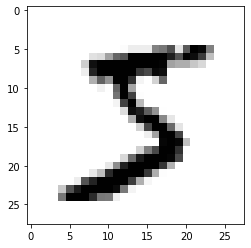

Label of the training data[0]: 5


In [28]:
##load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data();

##visialize the data we are going to deal with
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print('Label of the training data[0]:', y_train[0])

In [29]:
##reshape data
data_reshape_train = len(x_train)*[len(x_train[0])*len(x_train[0])*[0]];
for i in range(len(x_train)):
    data_reshape_train[i] = np.reshape(x_train[i], -1);

data_reshape_test = len(x_test)*[len(x_test[0])*len(x_test[0])*[0]];
for i in range(len(x_test)):
    data_reshape_test[i] = np.reshape(x_test[i], -1);
    
print(np.shape(data_reshape_train));
print(np.shape(data_reshape_test));


(60000, 784)
(10000, 784)


(60000, 2)
(10000, 2)


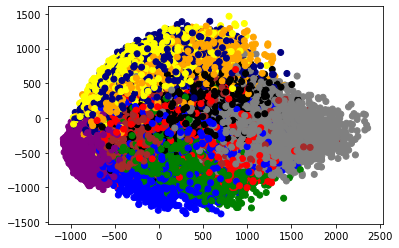

In [32]:
##apply PCA
pca = PCA(n_components = 2); 
pca.fit(data_reshape_train);
data_training = pca.transform(data_reshape_train);
data_testing = pca.transform(data_reshape_test);

print(np.shape(data_training));
print(np.shape(data_testing));

colormap = np.array(['Grey', 'Purple', 'Blue', 'Green', 'Orange', 'Red',
                      'Black','Yellow', 'Brown', 'Navy'])

plt.scatter(data_training[:,0], data_training[:,1], c=colormap[y_train])
plt.show()
#print(len(data_training));

In [49]:
%%time
##train svm (linear)
from sklearn.preprocessing import scale
X_train_scaled = scale(data_training);
X_test_scaled = scale(data_testing);

linear_model = svm.SVC(C=0.1, kernel='linear',degree = 3, gamma=7, max_iter = 1e6)  
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=linear_pred), "\n")

#model.save('Linear_SVM_Model')
#new_model = tf.keras.models.load_model('Linear_SVM_Model')


accuracy: 0.4525 

Wall time: 1min 39s


In [62]:
%%time
##train svm (poly)
from sklearn.preprocessing import scale
X_train_scaled = scale(data_training);
X_test_scaled = scale(data_testing);

poly_model = svm.SVC(C=0.01,kernel='poly',degree = 2, gamma=3, max_iter = 1e5)  
poly_model.fit(X_train_scaled, y_train)
poly_pred = poly_model.predict(X_test_scaled)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=poly_pred), "\n")


accuracy: 0.333 

Wall time: 2min 39s


In [53]:
%%time
##train svm (rbf)
from sklearn.preprocessing import scale
X_train_scaled = scale(data_training);
X_test_scaled = scale(data_testing);

non_linear_model = svm.SVC(kernel='rbf', degree = 3, gamma=0.5)  
non_linear_model.fit(X_train_scaled, y_train)
rbf_pred = non_linear_model.predict(X_test_scaled)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=rbf_pred), "\n")


accuracy: 0.4785 

Wall time: 2min 38s
